## 03 - Modelling

## Optional - Colab Setup

In [0]:
def upgrade_runtime_ram():
    meminfo = subprocess.getoutput('cat /proc/meminfo').split('\n')

    memory_info = {entry.split(':')[0]: int(entry.split(':')[1].replace(' kB','').strip()) for entry in meminfo}

    if memory_info['MemTotal'] > 17000000:
        return

    a = []
    while(1):
        a.append('1')

In [0]:
def restart_runtime():
    os.kill(os.getpid(), 9)

In [0]:
def setup_rapids():
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    device_name = pynvml.nvmlDeviceGetName(handle)
    if (device_name != b'Tesla T4') and (device_name != b'Tesla P4') and (device_name != b'Tesla P100-PCIE-16GB'):
        print("Wrong GPU - Restarting Runtime")
        restart_runtime()


    # clone RAPIDS AI rapidsai-csp-utils scripts repo
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git

    # install RAPIDS
    !bash rapidsai-csp-utils/colab/rapids-colab.sh 0.13


    # set necessary environment variables 
    dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
    sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
    sys.path

    # update pyarrow & modules 
    exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

In [0]:
def setup_conda():
    if not 'Miniconda3-4.5.4-Linux-x86_64.sh' in os.listdir():
        !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local

    if not ('EPFL-Capstone-Project' in os.listdir()) and (os.getcwd().split('/')[-1] != 'EPFL-Capstone-Project'):
        !git clone https://github.com/helmigsimon/EPFL-Capstone-Project  
    if 'EPFL-Capstone-Project' in os.listdir():
        os.chdir('EPFL-Capstone-Project')

    !conda env create -f environment.yml
    !conda activate exts-ml

In [0]:
def setup_drive():
    #Mounting Google Drive
    global drive
    from google.colab import drive
    drive.mount('/content/drive')

In [6]:
try:
    import sys,os,subprocess
    
    upgrade_runtime_ram()
    setup_drive()

    #Setting up PyPi Packages
    !pip install geopandas sparse-dot-topn pdpipe category-encoders catboost xgboost
    import geopandas as gpd
    import sparse_dot_topn.sparse_dot_topn as ct
    import pdpipe as pdp
    import category_encoders
    import xgboost as xgb

    #Setting up Conda Packages
    setup_conda()
    
    #Initializing NLTK
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    
    #Setting up RAPIDS AI
    import pynvml
    setup_rapids()
    
    from cuml import UMAP
    
except ModuleNotFoundError as e:
    print(e)
    print('Not in colab environment, continuing to run locally')
    from umap import UMAP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached geopandas-0.7.0-py2.py3-none-any.whl (928 kB)
Processing /root/.cache/pip/wheels/aa/e7/c7/e64559d518bcc12ed7e40a605ae304259b957ae8181c8d1e82/sparse_dot_topn-0.2.9-cp36-cp36m-linux_x86_64.whl
  Using cached pdpipe-0.0.49-py3-none-any.whl (48 kB)
  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)
  Using cached catboost-0.23.1-cp36-none-manylinux1_x86_64.whl (64.7 MB)
     |████████████████████████████████| 109.7 MB 2.8 kB/s 
  Using cached Fiona-1.8.13.post1-cp36-cp36m-manylinux1_x86_64.whl (14.7 MB)
  Using cached pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl (10.9 MB)
     |████████████████████████████████| 1.8 MB 41.8 MB/s 
     |████████████████████████████████| 2.1 MB 37.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Using cached strct-0.0.30-py2.py3-none-any.whl (16 kB)
  Using cached skutil-0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

## Imports

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split,  StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
tqdm.pandas()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [0]:
from lib.transformers import *
from lib.pipelines import *
from lib.processing import save_to_pkl, load_from_pkl
from lib.visualization import GridSearchPlotter
from data.util.paths import DATA_PATH

In [0]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

In [0]:
from cuml import LinearRegression, RandomForestRegressor, Ridge, Lasso

In [0]:
from catboost import CatBoostRegressor

## Loading Data

In [0]:
metadata_df, image_embeddings_df = tuple(load_from_pkl(i,DATA_PATH) for i in ('metadata','image_embeddings'))
df = metadata_df.merge(image_embeddings_df,how='inner',on='release_id')
df = OutlierRemover(features=['number_of_tracks'] + [i for i in df.columns if 'umap' in i]).fit_transform(df[(df['running_time'] < 180) | (df['running_time'].isna())])

In [0]:
del metadata_df, image_embeddings_df

In [15]:
col_set = {
    'format': {
        'description': 'format_description_', 
        'name': 'format_name_', 
        'text': ('format_text_clean'),
        'quantity': ('format_quantity')
    },
    'geography': {
        'superregion': 'superregion_',
        'region': 'region_',
        'country': 'country_'
    },
    'timeperiod': {
        'period': 'period_',
        'era': 'era_'
    },
    'genre': 'genre_',
    'style': 'style_',
    'null': None,
    'indicator': lambda x: x.max() == 1 and x.min() == 0,
    'image_embedding': 'image_umap_'
}
column_store = ColumnStore()
column_store.fit(df,col_set)

In [0]:
df = df[df['year']>1949]
df = df[df[column_store._genre].sum(axis=1)==0]

## Preparing for Machine Learning

In [0]:
X_tr, X_te, y_tr, y_te = train_test_split(df.drop('market_value',axis=1),df.market_value,random_state=0)

In [0]:
units_for_sale_imputer = SimpleImputer(strategy='constant',fill_value=0)
average_rating_imputer = SimpleImputer(strategy='mean')

In [0]:
X_tr['units_for_sale'] = units_for_sale_imputer.fit_transform(X_tr['units_for_sale'].values.reshape(-1,1))
X_te['units_for_sale'] = units_for_sale_imputer.transform(X_te['units_for_sale'].values.reshape(-1,1))

In [0]:
X_tr['average_rating'] = average_rating_imputer.fit_transform(X_tr['average_rating'].values.reshape(-1,1))
X_te['average_rating'] = average_rating_imputer.transform(X_te['average_rating'].values.reshape(-1,1))

In [0]:
df_sample = pd.concat([X_tr,y_tr],axis=1).sample(frac=0.1)
X_tr_sample = df_sample.drop('market_value',axis=1)
y_tr_sample = df_sample['market_value']

In [0]:
del df

## Setting up Dummy Regression for baseline

In [0]:
dummy_regressor = DummyRegressor(strategy='mean')

In [24]:
dummy_regressor.fit(X_tr,np.log(y_tr).values)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [0]:
dummy_pred = dummy_regressor.predict(X_te)

In [26]:
r2_score(y_te,np.exp(dummy_pred))

-0.07504973843038432

In [27]:
mean_absolute_error(y_te,np.exp(dummy_pred))

10.418513133902412

## Linear Regression - Record Store

In [0]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
record_store_regression_transformer = ColumnTransformer(transformers=[
    ('year_encoder', OneHotEncoder(dtype=np.uint8,handle_unknown='ignore'), ['year'])
], remainder='passthrough')

In [0]:
record_store_regression_removal_columns = set([
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','country','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','days_since_last_sale','title', 'release_id'
])

In [0]:
record_store_regression_processing = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','master_id','format_name'])),
    ('record_store_column_remover', ColumnRemover(record_store_regression_removal_columns)),
    ('preprocessing',record_store_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalize', MinMaxScaler())                        
])

record_store_lr_pipe = Pipeline([
    ('processing', record_store_regression_processing),
    ('lr', GridSearchCV(
        LinearRegression(),
        param_grid={
            'normalize': [True, False]
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
    ))
])

In [32]:
record_store_lr_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.8s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.6s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='va...
                              estimator=LinearRegression(algorithm='eig', fit_intercept=Tr

In [33]:
record_store_lr_pipe.steps[-1][-1].best_score_

-0.520049832102794

In [34]:
record_store_lr_pred = record_store_lr_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [35]:
r2_score(y_te,np.exp(record_store_lr_pred))

0.20382318307613334

In [36]:
mean_absolute_error(y_te,np.exp(record_store_lr_pred))

8.221763449209202

## Linear Regression - Full Information

In [0]:
full_information_regression_transformer = ColumnTransformer(transformers=[
    ('year_encoder', OneHotEncoder(dtype=np.uint8,handle_unknown='ignore'), ['year'])
], remainder='passthrough')

In [0]:
full_information_columns = set([
    'units_for_sale','community_have','community_want','average_rating','rating_count'
])
full_information_regression_removal_columns = record_store_regression_removal_columns - full_information_columns

In [0]:
full_information_regression_processing = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','master_id','format_name'])),
    ('record_store_column_remover', ColumnRemover(full_information_regression_removal_columns)),
    ('preprocessing',full_information_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalize',MinMaxScaler())
])

full_information_lr_pipe = Pipeline([
    ('processing', full_information_regression_processing),
    ('lr', GridSearchCV(
        LinearRegression(),
        param_grid={
            'normalize':[False,True]
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
    ))
])

In [40]:
full_information_lr_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.2s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='va...
                              estimator=LinearRegression(algorithm='eig', fit_intercept=Tr

In [41]:
full_information_lr_pipe['lr'].best_score_

-0.47978700167755567

In [42]:
full_information_lr_pred = record_store_lr_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [43]:
r2_score(y_te,np.exp(full_information_lr_pred))

0.20382318307613334

In [44]:
mean_absolute_error(y_te,np.exp(full_information_lr_pred))

8.221763449209202

## Ridge Regression - Record Store

In [0]:
record_store_ridge_pipe = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id'])),
    ('record_store_column_remover', ColumnRemover(record_store_regression_removal_columns)),
    ('preprocessing',record_store_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalization',MinMaxScaler()),
    ('ridge', GridSearchCV(
        Ridge(normalize=False,solver='eig'),
        param_grid={
            'alpha': np.linspace(1e-20,1e-1,10),
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [156]:
record_store_ridge_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.7s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('running_time_imputer',
                 RunningTimeImputer(number_of_tracks='number_of_tracks',
                                    running_time='running_time')),
                ('leave_one_out_encoding',
                 LeaveOneOutEncoder(cols=['artist', 'label', 'format_text',
                                          'format_name', 'master_id'],
                                    drop_invariant=False,
                                    handle_missing='value',
                                    handle_unknown='value', random_state=None,
                                    return_df=True, sigm...
                              estimator=Ridge(alpha=1.0, solver='eig', fit_intercept=True, normalize=False, handle=<cuml.common.handle.Handle object at 0x7faa992d4950>, output_type='input'),
                              iid='deprecated', n_jobs=-1,
                              param_grid={'alpha': array([1.00000000e-20, 1.11111111e-02, 2.22222222

In [0]:
plotter = GridSearchPlotter(record_store_ridge_pipe['ridge'])

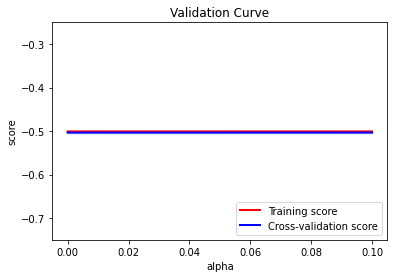

In [158]:
plotter.plot_validation_curve(parameter='alpha',ylim=(-0.75,-0.25))

In [159]:
record_store_ridge_pipe['ridge'].best_score_

-0.5035058857221621

In [160]:
record_store_ridge_pipe['ridge'].best_params_

{'alpha': 0.1}

In [161]:
record_store_ridge_pred = record_store_ridge_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [162]:
r2_score(y_te,np.exp(record_store_ridge_pred))

0.20449145454034268

In [163]:
mean_absolute_error(y_te,np.exp(record_store_ridge_pred))

8.218258459392512

## Ridge - Full Information

In [0]:
full_information_ridge_pipe = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id'])),
    ('record_store_column_remover', ColumnRemover(full_information_regression_removal_columns)),
    ('preprocessing',full_information_regression_transformer),
    ('scaler', StandardScaler()),
    ('normalization', MinMaxScaler()),
    ('ridge', GridSearchCV(
        Ridge(normalize=False,solver='eig'),
        param_grid={
            'alpha': np.logspace(-3,3,10),
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [55]:
full_information_ridge_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.5s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('running_time_imputer',
                 RunningTimeImputer(number_of_tracks='number_of_tracks',
                                    running_time='running_time')),
                ('leave_one_out_encoding',
                 LeaveOneOutEncoder(cols=['artist', 'label', 'format_text',
                                          'format_name', 'master_id'],
                                    drop_invariant=False,
                                    handle_missing='value',
                                    handle_unknown='value', random_state=None,
                                    return_df=True, sigm...
                              estimator=Ridge(alpha=1.0, solver='eig', fit_intercept=True, normalize=False, handle=<cuml.common.handle.Handle object at 0x7faa93626fb0>, output_type='input'),
                              iid='deprecated', n_jobs=-1,
                              param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469

In [0]:
plotter = GridSearchPlotter(full_information_ridge_pipe['ridge'])

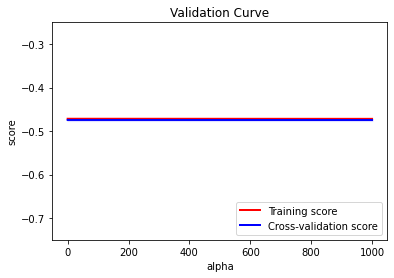

In [57]:
plotter.plot_validation_curve(parameter='alpha',ylim=(-0.75,-0.25))

In [58]:
full_information_ridge_pipe['ridge'].best_score_

-0.4744432855195089

In [59]:
full_information_ridge_pipe['ridge'].best_params_

{'alpha': 215.44346900318823}

In [60]:
full_information_ridge_pred = full_information_ridge_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [61]:
r2_score(y_te,np.exp(full_information_ridge_pred))

-7.469775953696709

In [62]:
mean_absolute_error(y_te,np.exp(full_information_ridge_pred))

8.13795304967769

## Random Forest - Record Store

In [0]:
record_store_random_forest_removal_columns = [
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','country','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','days_since_last_sale','title','release_id'
]
record_store_random_forest_removal_columns.extend(
    column_store._indicator
)
record_store_random_forest_removal_columns = set(record_store_random_forest_removal_columns)

In [0]:
record_store_random_forest_preprocessing_pipe = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id','year','country'])),
    ('reduce_indicators', IndicatorReducer(indicators=column_store._indicator,algorithm=PCA,components=40)),
    ('record_store_column_remover', ColumnRemover(record_store_random_forest_removal_columns)),
    ('robust_scaler', RobustScaler()),
    ('normalization', MinMaxScaler()),
    ('cast_to_32', FunctionTransformer(func=lambda x: x.astype(np.float32)))
])

random_forest = RandomForestRegressor()

record_store_random_forest_search_pipe = Pipeline([
    ('preprocessing',record_store_random_forest_preprocessing_pipe),
    ('grid_search', GridSearchCV(
        random_forest,
        cv=KFold(n_splits=5,shuffle=True),
        param_grid={
            'n_estimators': np.linspace(10,200,5).astype(int)
        },
        verbose=50,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    ))
])

record_store_random_forest_pipe = Pipeline([
    ('preprocessing',record_store_random_forest_preprocessing_pipe),
    ('random_forest',random_forest)
])

In [169]:
record_store_random_forest_search_pipe.fit(X_tr_sample,np.log(y_tr_sample).values.astype(np.float32))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.4min remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.8min remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  2.0min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  2.1min remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  2.2min remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished


/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value...
                              estimator=RandomForestRegressor(n_estimators=100, max

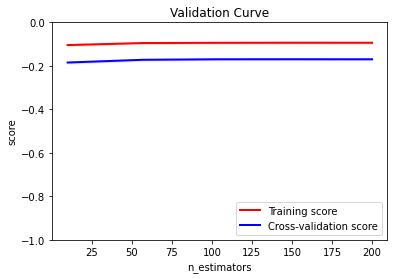

In [170]:
record_store_random_forest_plotter = GridSearchPlotter(record_store_random_forest_search_pipe.steps[-1][1])
record_store_random_forest_plotter.plot_validation_curve(parameter='n_estimators',ylim=(-1,0))

In [171]:
record_store_random_forest_search_pipe.steps[-1][1].best_score_

-0.1692010998725891

In [172]:
record_store_random_forest_search_pipe.steps[-1][1].best_params_

{'n_estimators': 152}

In [173]:
record_store_random_forest_pipe.fit(X_tr,np.log(y_tr).values.astype(np.float32))

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value...
                 RandomForestRegressor(n_estimators=100, max_depth=16, handle=<cuml

In [174]:
record_store_random_forest_te_pred = record_store_random_forest_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [177]:
r2_score(y_te,np.exp(record_store_random_forest_te_pred))

-0.10311887111913931

In [178]:
mean_absolute_error(y_te,np.exp(record_store_random_forest_te_pred))

10.448137215461019

## Random Forest - Full Information

In [0]:
full_information_random_forest_removal_columns = record_store_random_forest_removal_columns - full_information_columns

In [28]:
full_information_random_forest_preprocessing_pipe = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id','year','country'])),
    #('reduce_indicators', IndicatorReducer(indicators=column_store._indicator,algorithm=PCA,components=40)),
    ('record_store_column_remover', ColumnRemover(full_information_random_forest_removal_columns)),
    ('cast_to_32', FunctionTransformer(func=lambda x: x.astype(np.float32).values))
])

full_information_random_forest_search_pipe = Pipeline([
    ('preprocessing',full_information_random_forest_preprocessing_pipe),
    ('grid_search', GridSearchCV(
        random_forest,
        cv=KFold(n_splits=5,shuffle=True),
        param_grid={
            'n_estimators': np.linspace(10,200,5).astype(int)
        },
        verbose=50,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    ))
])

full_information_random_forest_pipe = Pipeline([
    ('preprocessing',full_information_random_forest_preprocessing_pipe),
    ('random_forest',random_forest)
])

NameError: ignored

In [29]:
full_information_random_forest_search_pipe.fit(X_tr_sample,np.log(y_tr_sample).values.astype(np.float32))

NameError: ignored

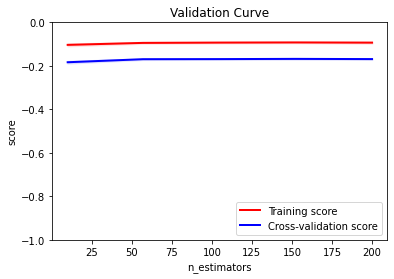

In [76]:
full_information_random_forest_plotter = GridSearchPlotter(full_information_random_forest_search_pipe.steps[-1][1])
full_information_random_forest_plotter.plot_validation_curve(parameter='n_estimators',ylim=(-1,0))

In [77]:
full_information_random_forest_search_pipe.steps[-1][1].best_score_

-0.16753565669059753

In [78]:
full_information_random_forest_search_pipe.steps[-1][1].best_params_

{'n_estimators': 152}

In [79]:
full_information_random_forest_pipe.fit(X_tr,np.log(y_tr).values.astype(np.float32))

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id',
                                                           'year'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_u...
                 RandomForestR

In [80]:
full_information_random_forest_te_pred = full_information_random_forest_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [81]:
r2_score(y_te,np.exp(full_information_random_forest_te_pred))

-0.10182890895470176

In [82]:
mean_absolute_error(y_te,np.exp(full_information_random_forest_te_pred))

10.437374548180669

## XGBoost - Record Store

In [0]:
xgboost = xgb.XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=5,
    objective='reg:linear',
    booster='gbtree',
    gamma=0,
    random_state=0,
    tree_method='gpu_hist',
)
record_store_xgb_grid_pipe = Pipeline([
    ('processing', record_store_regression_processing),
    ('lr', GridSearchCV(
        xgb.XGBRegressor(),
        param_grid={
            'max_depth': np.linspace(3,20,5).astype(int)
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [50]:
record_store_xgb_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.6min finished


[09:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='va...
                                                     n_estimators=100, n_jobs=1,
         

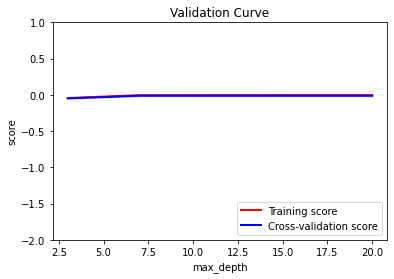

In [51]:
record_store_xgb_plot = GridSearchPlotter(record_store_xgb_grid_pipe.steps[-1][1])
record_store_xgb_plot.plot_validation_curve(parameter='max_depth',ylim=(-2,1))

In [52]:
record_store_xgb_grid_pipe.steps[-1][1].best_score_

-0.011496590106207173

In [53]:
record_store_xgb_grid_pipe.steps[-1][1].best_params_

{'max_depth': 7}

In [0]:
record_store_xgb_te_pred = record_store_xgb_pipe.predict(X_te)

In [55]:
r2_score(y_te,np.exp(record_store_xgb_te_pred))

-0.07203988754811963

In [56]:
mean_absolute_error(y_te,np.exp(record_store_xgb_te_pred))

10.193350589602566

## Catboost - Record Store

In [0]:
record_store_catboost_removal_columns = set([
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','days_since_last_sale','title','release_id'
])
record_store_catboost_removal_columns = record_store_catboost_removal_columns.union(column_store._geography_country)

In [0]:
record_store_catboost_processing_pipe = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('record_store_column_remover', ColumnRemover(record_store_catboost_removal_columns)),
])

catboost = CatBoostRegressor(
    random_seed=0,
    cat_features=['year','format_text','master_id','format_name','artist','label','country'],
    boosting_type='Ordered',
    n_estimators=100,
    learning_rate=0.1,
    l2_leaf_reg=3,
    border_count=170,
    max_depth=10,
)

record_store_catboost_grid_pipe = Pipeline([
    ('processing', record_store_catboost_processing_pipe),
    ('grid_search', GridSearchCV(
        catboost,
        param_grid={
            #'learning_rate': np.logspace(-3,1,5),
            #'border_count': np.linspace(1,200,5),
            'l2_leaf_reg': [1,3,5,8],
        },
        n_jobs=-1,
        cv=KFold(n_splits=5,shuffle=True),
        verbose=1,
        scoring='neg_mean_absolute_error',
        return_train_score=True)
    )
])

record_store_catboost_pipe = Pipeline([
    ('processing', record_store_catboost_processing_pipe),
    ('catboost',catboost)
])

In [85]:
record_store_catboost_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.2min finished


0:	learn: 0.8435499	total: 294ms	remaining: 29.2s
1:	learn: 0.8257147	total: 493ms	remaining: 24.2s
2:	learn: 0.8096158	total: 696ms	remaining: 22.5s
3:	learn: 0.7954620	total: 892ms	remaining: 21.4s
4:	learn: 0.7841133	total: 950ms	remaining: 18s
5:	learn: 0.7732846	total: 1.15s	remaining: 18s
6:	learn: 0.7630579	total: 1.35s	remaining: 18s
7:	learn: 0.7557761	total: 1.55s	remaining: 17.9s
8:	learn: 0.7476804	total: 1.75s	remaining: 17.7s
9:	learn: 0.7396376	total: 1.95s	remaining: 17.5s
10:	learn: 0.7324130	total: 2.15s	remaining: 17.4s
11:	learn: 0.7275638	total: 2.17s	remaining: 15.9s
12:	learn: 0.7229593	total: 2.26s	remaining: 15.1s
13:	learn: 0.7193264	total: 2.46s	remaining: 15.1s
14:	learn: 0.7158377	total: 2.66s	remaining: 15.1s
15:	learn: 0.7121851	total: 2.85s	remaining: 15s
16:	learn: 0.7092309	total: 3.05s	remaining: 14.9s
17:	learn: 0.7061470	total: 3.24s	remaining: 14.8s
18:	learn: 0.7041067	total: 3.34s	remaining: 14.2s
19:	learn: 0.7023871	total: 3.39s	remaining: 13.6

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'average_rating',
                                                                'community_have',
                                                                'community_want',
                                                                'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'coun...
                          verbose=False)),


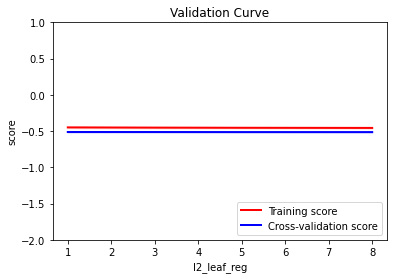

In [86]:
record_store_catboost_plot = GridSearchPlotter(record_store_catboost_grid_pipe.steps[-1][1])
record_store_catboost_plot.plot_validation_curve(parameter='l2_leaf_reg',ylim=(-2,1))

In [87]:
record_store_catboost_grid_pipe.steps[-1][1].best_score_

-0.5113422342300346

In [88]:
record_store_catboost_grid_pipe.steps[-1][1].best_params_

{'l2_leaf_reg': 1}

In [89]:
record_store_catboost_pipe.fit(X_tr,np.log(y_tr))

0:	learn: 0.8427669	total: 591ms	remaining: 58.5s
1:	learn: 0.8210181	total: 1.09s	remaining: 53.7s
2:	learn: 0.8030254	total: 1.6s	remaining: 51.6s
3:	learn: 0.7877739	total: 2.1s	remaining: 50.4s
4:	learn: 0.7719954	total: 2.6s	remaining: 49.3s
5:	learn: 0.7585067	total: 3.09s	remaining: 48.4s
6:	learn: 0.7465543	total: 3.6s	remaining: 47.8s
7:	learn: 0.7364661	total: 4.1s	remaining: 47.2s
8:	learn: 0.7276324	total: 4.61s	remaining: 46.6s
9:	learn: 0.7204550	total: 5.12s	remaining: 46s
10:	learn: 0.7136106	total: 5.62s	remaining: 45.5s
11:	learn: 0.7083812	total: 6.13s	remaining: 45s
12:	learn: 0.7036820	total: 6.63s	remaining: 44.4s
13:	learn: 0.6993458	total: 7.14s	remaining: 43.9s
14:	learn: 0.6928528	total: 7.64s	remaining: 43.3s
15:	learn: 0.6871808	total: 8.13s	remaining: 42.7s
16:	learn: 0.6823513	total: 8.63s	remaining: 42.2s
17:	learn: 0.6782538	total: 9.13s	remaining: 41.6s
18:	learn: 0.6747978	total: 9.62s	remaining: 41s
19:	learn: 0.6721154	total: 10.1s	remaining: 40.5s
2

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'average_rating',
                                                                'community_have',
                                                                'community_want',
                                                                'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'coun...
                                           

In [0]:
record_store_catboost_te_pred = record_store_catboost_pipe.predict(X_te)

In [91]:
r2_score(y_te,np.exp(record_store_catboost_te_pred))

0.27608996817980935

In [92]:
mean_absolute_error(y_te,np.exp(record_store_catboost_te_pred))

7.788725056722764

## CatBoost - Full Information

In [0]:
full_information_catboost_removal_columns = record_store_catboost_removal_columns - full_information_columns

In [0]:
full_information_catboost_processing_pipe = Pipeline([
    ('running_time_imputer',RunningTimeImputer('running_time','number_of_tracks')),
    ('record_store_column_remover', ColumnRemover(full_information_catboost_removal_columns)),
])

full_information_catboost_grid_pipe = Pipeline([
    ('processing', full_information_catboost_processing_pipe),
    ('grid_search', GridSearchCV(
        catboost,
        param_grid={            
            #'learning_rate': np.logspace(-3,1,5),
            #'border_count': np.linspace(1,200,5),
            'l2_leaf_reg': [1,3,5,8],
        },
        n_jobs=3,
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=50,
        return_train_score=True)
    )
])

full_information_catboost_pipe = Pipeline([
    ('processing', full_information_catboost_processing_pipe),
    ('catboost',catboost)
])

In [67]:
full_information_catboost_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample).values)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   46.4s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   47.2s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   51.5s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  1.6min


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  16 out of  20 | elapsed:  5.1min remaining:  1.3min
[Parallel(n_jobs=3)]: Done  17 out of  20 | elapsed:  5.2min remaining:   54.5s
[Parallel(n_jobs=3)]: Done  18 out of  20 | elapsed:  5.2min remaining:   34.3s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  5.7min remaining:    0.0s
[Parallel

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                '...
                          verbose=False)),


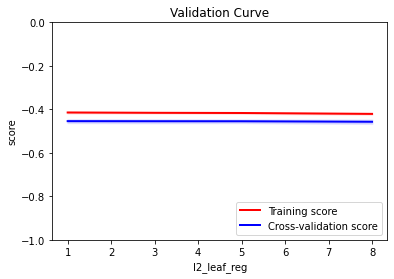

In [68]:
full_information_catboost_plot = GridSearchPlotter(full_information_catboost_grid_pipe.steps[-1][1])
full_information_catboost_plot.plot_validation_curve(parameter='l2_leaf_reg',ylim=(-1,0))

In [69]:
full_information_catboost_grid_pipe.steps[-1][1].best_score_

-0.45383880183986386

In [70]:
full_information_catboost_grid_pipe.steps[-1][1].best_params_

{'l2_leaf_reg': 1}

In [71]:
full_information_catboost_pipe.fit(X_tr,np.log(y_tr))

0:	learn: 0.8314495	total: 680ms	remaining: 1m 7s
1:	learn: 0.8016748	total: 1.27s	remaining: 1m 2s
2:	learn: 0.7774311	total: 1.86s	remaining: 1m
3:	learn: 0.7549796	total: 2.43s	remaining: 58.4s
4:	learn: 0.7358416	total: 3.01s	remaining: 57.2s
5:	learn: 0.7198930	total: 3.58s	remaining: 56.2s
6:	learn: 0.7058020	total: 4.15s	remaining: 55.1s
7:	learn: 0.6921657	total: 4.74s	remaining: 54.6s
8:	learn: 0.6804227	total: 5.31s	remaining: 53.7s
9:	learn: 0.6709621	total: 5.91s	remaining: 53.2s
10:	learn: 0.6624218	total: 6.49s	remaining: 52.5s
11:	learn: 0.6550002	total: 7.07s	remaining: 51.9s
12:	learn: 0.6481225	total: 7.65s	remaining: 51.2s
13:	learn: 0.6422551	total: 8.22s	remaining: 50.5s
14:	learn: 0.6372196	total: 8.81s	remaining: 49.9s
15:	learn: 0.6328979	total: 9.38s	remaining: 49.2s
16:	learn: 0.6287994	total: 9.95s	remaining: 48.6s
17:	learn: 0.6257298	total: 10.5s	remaining: 47.9s
18:	learn: 0.6227171	total: 11.1s	remaining: 47.3s
19:	learn: 0.6190108	total: 11.7s	remaining:

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                '...
                                           

In [0]:
full_information_catboost_te_pred = full_information_catboost_pipe.predict(X_te)

In [73]:
r2_score(y_te,np.exp(full_information_catboost_te_pred))

0.3944461702713298

In [74]:
mean_absolute_error(y_te,np.exp(full_information_catboost_te_pred))

7.123721140192723

## Identification of Feature Importances

In [0]:
feature_importance_transformation_pipe = full_information_catboost_processing_pipe.fit(X_tr,np.log(y_tr).values)
full_information_catboost_feature_importances = dict(zip(
    feature_importance_transformation_pipe.transform(X_te).columns,
    full_information_catboost_pipe.steps[-1][-1].feature_importances_
))

In [76]:
pd.Series(full_information_catboost_feature_importances).sort_values(ascending=False).head(20)

community_want                        19.230088
units_for_sale                        15.779837
country                               15.556832
format_name                            9.747956
label                                  6.171569
year                                   5.596909
region_eastern asia                    5.427158
artist                                 3.586493
community_have                         2.929832
superregion_europe                     1.835236
average_rating                         1.459620
format_quantity                        1.370903
master_id                              1.207412
format_text                            1.173255
number_of_tracks                       1.006565
format_description_Limited Edition     0.961755
era_contemporary                       0.776566
format_description_Reissue             0.758808
format_description_Club Edition        0.608544
period_cool                            0.539620
dtype: float64